In [1]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Load the cryptocurrencies data
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


# Data Preparation

In [3]:
# Load the cryptocurrencies data
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Keep only cryptocurrencies that are on trading
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
print(crypto_df.shape)
crypto_df.head()

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Remove the "IsTrading" column
crypto_df = crypto_df.drop(columns='IsTrading')
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Remove rows with at least 1 null value
crypto_df = crypto_df.dropna()
print(crypto_df.shape)
crypto_df.head()

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [7]:
# Remove rows with cryptocurrencies without coins mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
print(crypto_df.shape)
crypto_df.head()

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [8]:
# Drop rows where there are 'N/A' text values
crypto_df = crypto_df[crypto_df!='N/A']
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df.drop(columns='CoinName', inplace=True)
print(crypto_df.shape)
crypto_df.head()

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [10]:
# Before proceeding, convert 'TotalCoinSupply' to a float:
crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].astype(float)

In [11]:
#Create dummies variables for text features
text_feature_variable = ''

# Import Label Encoder from SKLearn and encode categorical data:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(crypto_df['Algorithm'])
crypto_df['Algorithm'] = le.transform(crypto_df['Algorithm'])

le.fit(crypto_df['ProofType'])
crypto_df['ProofType'] = le.transform(crypto_df['ProofType'])


crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,52,15,4.199995e+01,4.200000e+01
404,52,15,1.055185e+09,5.320000e+08
1337,66,15,2.927942e+10,3.141593e+11
BTC,47,12,1.792718e+07,2.100000e+07
ETH,20,12,1.076842e+08,0.000000e+00


The number of rows remained the same but the number of columns increased to 98 

In [12]:
# Standardize data
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(crypto_df)
X_scaled

array([[ 3.76459118e-01,  8.91356555e-01, -1.17108170e-01,
        -1.52870298e-01],
       [ 3.76459118e-01,  8.91356555e-01, -9.39695522e-02,
        -1.45008997e-01],
       [ 1.21543803e+00,  8.91356555e-01,  5.24945609e-01,
         4.48942416e+00],
       ...,
       [-2.14047761e+00,  1.67233875e-03, -9.56133629e-02,
        -1.32179374e-01],
       [-1.66106109e+00,  1.67233875e-03, -1.16948169e-01,
        -1.52559984e-01],
       [ 3.76459118e-01, -1.48113469e+00, -1.17105357e-01,
        -1.52855521e-01]])

# Dimensionality Reduction

In [13]:
pca = PCA(0.90)
pca_cripto = pca.fit_transform(X_scaled) # << to retain the components in an object
pca_cripto

#pca.explained_variance_ratio_
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),3)  )

Components =  3 ;
Total explained variance =  0.927


The number of features we need to preserve 90% of the explained variance in dimensionality reduction is 3

In [14]:
# Create a DataFrame with the principal components data
pca_df = pd.DataFrame(
    data=pca_cripto, columns=["principal component 1", "principal component 2", "principal component 3"],
)
pca_df.head()

,principal component 1,principal component 2,principal component 3
0,-0.417875,0.810296,0.372138
1,-0.396564,0.815135,0.373256
2,3.124076,2.209780,0.504335
3,-0.192083,0.016266,-0.072910
4,-0.044116,-1.167492,1.012525


In [15]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [16]:
# Reduce dimensions with t-SNE 
tsne_df = tsne.fit_transform(pca_df)
tsne_df

array([[ 25.938377  ,   2.8593054 ],
       [ 20.509039  ,   2.9818597 ],
       [ -4.2517414 ,   1.3410125 ],
       ...,
       [ -2.2487268 ,  -6.6848617 ],
       [  0.46573183, -10.10907   ],
       [-22.339338  , -19.310041  ]], dtype=float32)

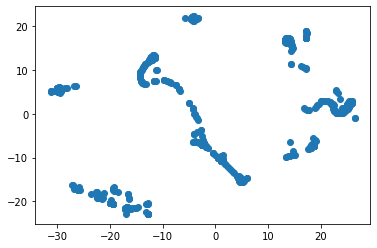

In [17]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_df[:,0],tsne_df[:,1])
plt.show()

There is no distinct clusters with this scatter plot 

# Cluster Analysis with k-Means

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


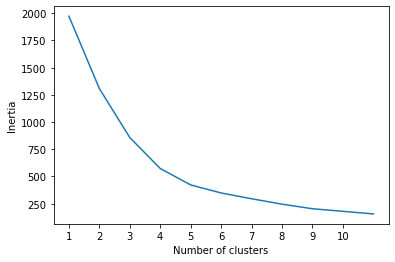

In [18]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,11]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow of the plot is appearing at k=4

Finally the cryptocurrencies can be clustered together into 4 clusters 